In [ ]:
# https://stackoverflow.com/questions/59280375/how-to-get-luminance-gradient-of-an-image

In [ ]:
import cv2
from myocr import easytools
import numpy as np

# import the necessary packages
from imutils import contours
from skimage import measure
import imutils
import matplotlib.pyplot as plt

import glob

import time

In [ ]:
pathlist = glob.glob('/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/*')
pathlist = sorted(pathlist, key=easytools.name_sort)
pathlist[:10]

['/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/100.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/101.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/102.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/103.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/104.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/105.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/106.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/107.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/108.jpg',
 '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/109.jpg']

### 연습코드

In [ ]:
def get_sobel_grad(image):
    lum = image[:, :, 1]
    grad_x = cv2.Sobel(lum, -1, 0, 1, ksize=7)
    grad_y = cv2.Sobel(lum, -1, 1, 0, ksize=7)
    grad = np.sqrt(grad_x**2 + grad_y**2)
    return grad

In [ ]:
def check_luminance(path, filter_size=20):
    image, _ = easytools.reformat_input(path)
    grad = get_sobel_grad(image)
    s = grad.shape
    l = filter_size*filter_size
    check_lum = False

    for i in range(filter_size, s[0]):
        for j in range(filter_size, s[1]):

            box = grad[i-filter_size:i, j-filter_size:j]

            check1 = np.count_nonzero(box == 0) > 0.95*l
            if check1:
                pixel = np.average(image[i-(filter_size//2), j-(filter_size//2)])
                if pixel+10 >= 255:
                    check_lum = True
                    break
            else:
                continue
        if check_lum:
            break

    return check_lum

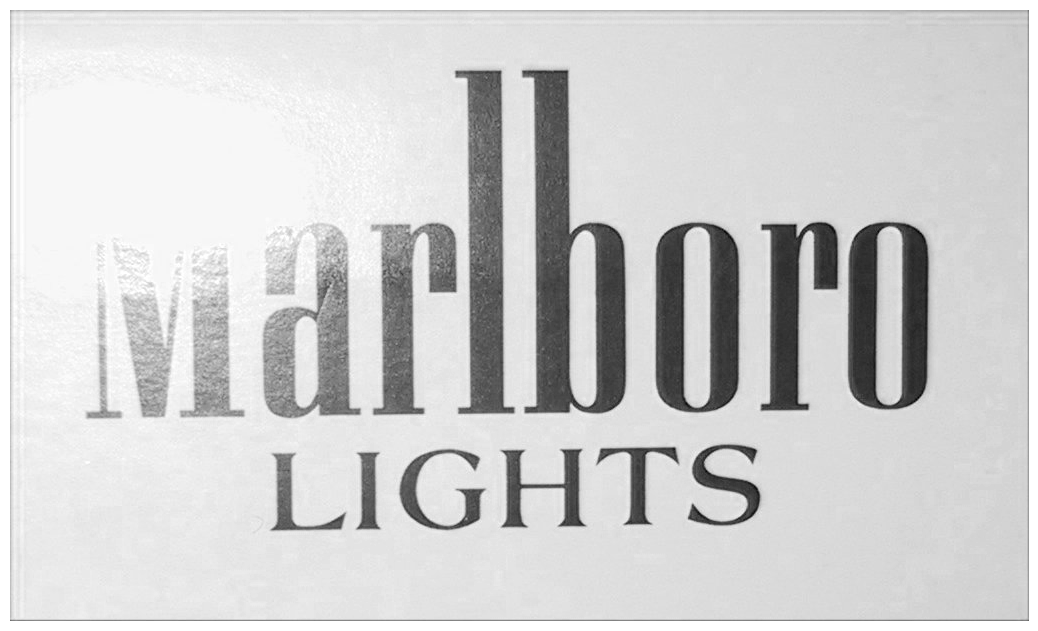

True

In [ ]:
path = pathlist[8]
image = cv2.imread(path)
lum = (image[...,0]*.299) + (image[...,0]*.587) + (image[...,0]*.114)
easytools.display(lum, 'gray')
check_luminance(path)

### 함수생성

In [ ]:
def check_luminance(path, filter_size=20, k_size=3):
    image, _ = reformat_input(path)
    grad = get_sobel_grad(image, k_size=k_size)
    s = grad.shape
    l = filter_size*filter_size*0.95

    for i in range(filter_size, s[0]):
        for j in range(filter_size, s[1]):

            box = grad[i-filter_size:i, j-filter_size:j]

            check1 = np.count_nonzero(box == 0) > l
            if check1:
                pixel = np.average(image[i-(filter_size//2), j-(filter_size//2)])
                if pixel+20 >= 255:
                    return True


# grad를 0과 1 (False, True)로 저장하고, sqrt없이 더하기로만 계산
def get_sobel_grad(image, k_size=3):
    lum = image[:, :, 1]
    grad_x = cv2.Sobel(lum, -1, 0, 1, ksize=k_size)
    grad_y = cv2.Sobel(lum, -1, 1, 0, ksize=k_size)
    grad = np.sqrt(grad_x**2 + grad_y**2)
    return grad


In [ ]:
save_textfile = '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/results_luminance(new).csv'

with open(save_textfile, 'w') as output:

    for path in pathlist:

        start = time.time()

        name = str(path.split('/')[-1])

        reflec = easytools.check_luminance(path)

        output.write(f'{name},{str(reflec)},{time.time()-start}\n')

    print("Complete to save every luminance images")

output.close()

Complete to save every luminance images


### Saving Luminance Images

In [ ]:
for i in [3,5,7]:
    saveroot = f'/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/luminance/my/{i}/'

    for path in pathlist:

        im = cv2.imread(path)                          # OpenCV method

        grad = easytools.get_sobel_grad(im, k_size=i)

        name = str(path.split('/')[-1])
        savepath = saveroot+name

        plt.axis('off')
        plt.imshow(grad, cmap='gray')
        plt.savefig(savepath)
        plt.clf()

    print("Complete to save every luminance images")

Complete to save every luminance images
Complete to save every luminance images
Complete to save every luminance images


<Figure size 640x480 with 0 Axes>

---
### 다른 시도들

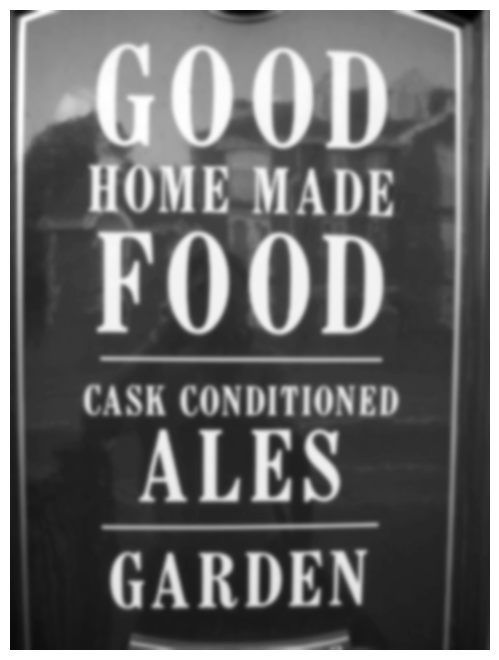

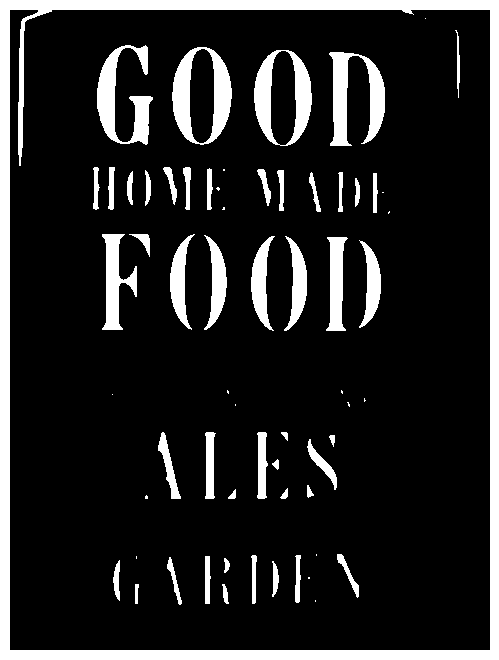

In [ ]:
blurred = cv2.GaussianBlur(img_gray, (11, 11), 0)
easytools.display(blurred, 'gray')
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
easytools.display(thresh, 'gray')

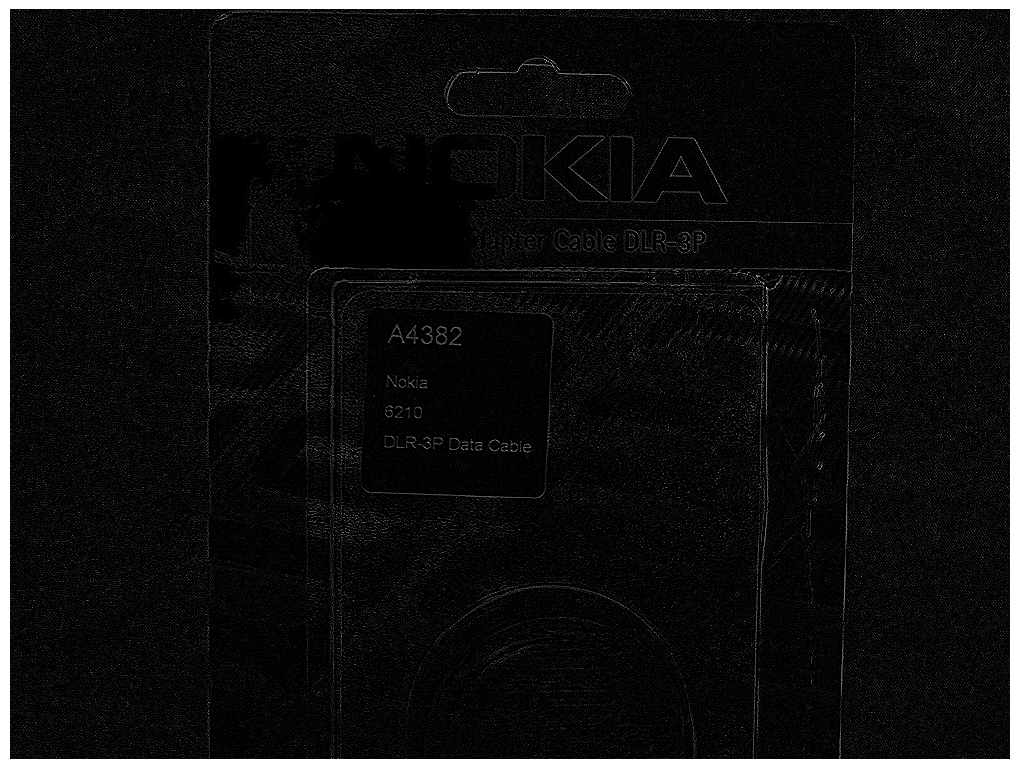

In [ ]:
binary_image = cv2.Laplacian(img_gray, cv2.CV_8UC1)
easytools.display(binary_image, 'gray')

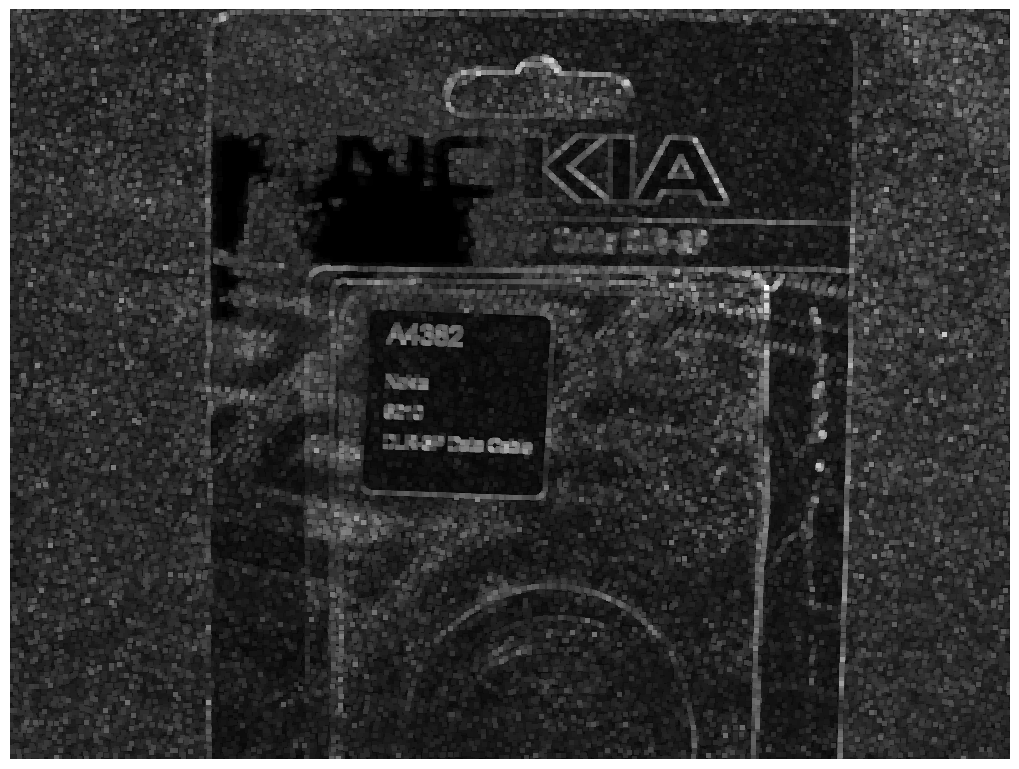

In [ ]:
#  fill in the holes between edges with dilation
dilated_image = cv2.dilate(binary_image, np.ones((5, 5)))
easytools.display(dilated_image, 'gray')

### Sample Check

In [ ]:
start = time.time()

path = '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/120.jpg'  #

image = cv2.imread(path)                        # OpenCV method
# print(image.shape)

height, width, _ = image.shape
image = cv2.resize(image, (width//2, height//2))
# easytools.display(image)

lum = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[...,2]
# image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# lum = image

# Calculate gradient in x-direction
gradX = cv2.Sobel(lum, -1, 0,1)
# And y-direction
gradY = cv2.Sobel(lum, -1, 1,0)
# And get combined gradient
grad = np.sqrt(gradX**2 + gradY**2)
print(grad.shape)
# grad = grad.astype(int)

# # plt.axis('off')
# # plt.imshow(grad, cmap='gray')
# # plt.savefig('120.jpg')
# # plt.clf()

# print(grad.shape)
check_luminance(grad)
# easytools.display(grad, 'gray')

# print(time.time()-start)

(480, 640)
True


True

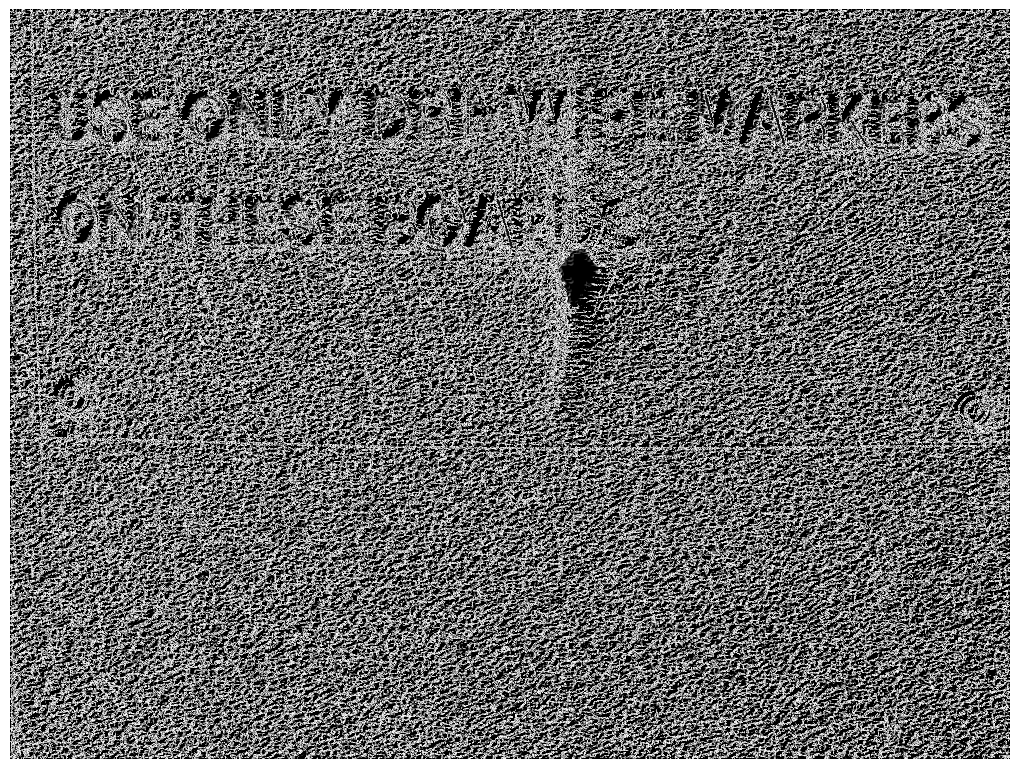

True


True

In [ ]:
path = '/media/nd-ygr/SAMSUNG/ndsoft/ai_project/ocr/data/FocusedSceneText/2013_train_images/120.jpg'
reflec = get_sobel_grad(path)
reflec